In [1]:
import pandas as pd
df=pd.read_csv('./grouped_data2.csv')
df


,credit_score,section of credit_score,country,age,age_group,gender,agegroup_gender,tenure,balance,balance_group,balance_per_tenure,products_number,credit_card,active_member,estimated_salary,churn
0,619,Poor,France,42,forties,Female,forties_Female,2,0.00,zero,0.000000,1,1,1,101348.88,1
1,608,Poor,Spain,41,forties,Female,forties_Female,1,83807.86,rest,83807.860000,1,0,1,112542.58,0
2,502,Very poor,France,42,forties,Female,forties_Female,8,159660.80,rest,19957.600000,3,1,0,113931.57,1
3,699,Fair,France,39,thirties,Female,thirties_Female,1,0.00,zero,0.000000,2,0,0,93826.63,0
4,850,Excellent,Spain,43,forties,Female,forties_Female,2,125510.82,rest,62755.410000,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Good,France,39,thirties,Male,thirties_Male,5,0.00,zero,0.000000,2,1,0,96270.64,0
9996,516,Very poor,France,35,thirties,Male,thirties_Male,10,57369.61,rest,5736.961000,1,1,1,101699.77,0
9997,709,Fair,France,36,thirties,Female,thirties_Female,7,0.00,zero,0.000000,1,0,1,42085.58,1
9998,772,Good,Germany,42,forties,Male,forties_Male,3,75075.31,rest,25025.103333,2,1,0,92888.52,1


In [2]:
print(df['balance_per_tenure'].median())
print(df['balance_per_tenure'].min())
print(df['balance_per_tenure'].max())
print(df['balance_per_tenure'].unique().size)

13992.102333333332
0.0
211774.31
6106


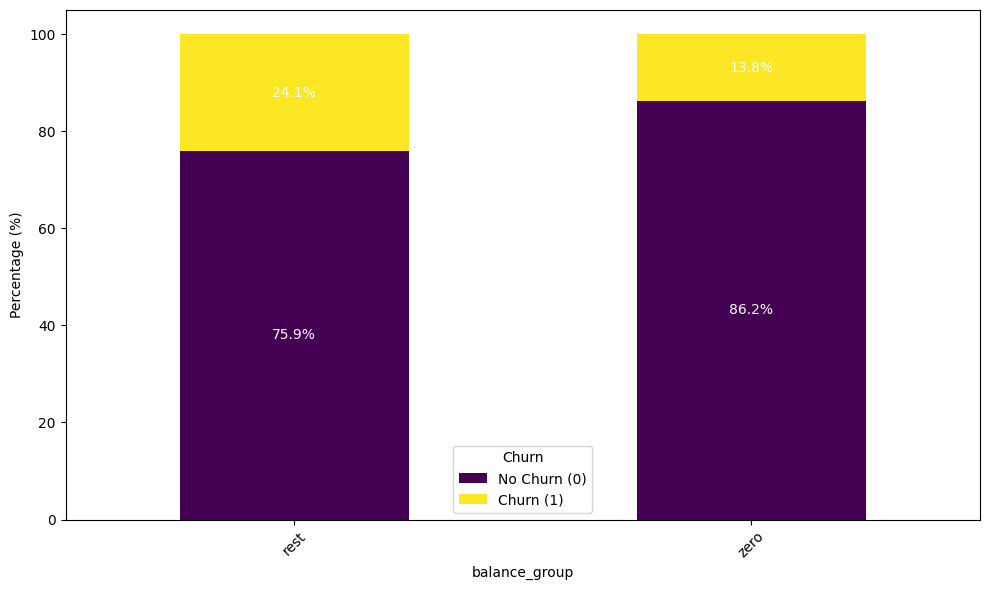

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그룹화하여 churn 값별 개수 계산
grouped_counts3 = df.groupby('balance_group')['churn'].value_counts().unstack(fill_value=0)

# 비율 계산
grouped_percentage3 = grouped_counts3.div(grouped_counts3.sum(axis=1), axis=0) * 100

# 비율 플롯 생성
plt.figure(figsize=(10, 6))

# Bar plot으로 비율 시각화
grouped_percentage3.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())

# 비율 표시
for i, (index, row) in enumerate(grouped_percentage3.iterrows()):
    for j, value in enumerate(row):
        plt.text(i, row.cumsum().iloc[j] - value / 2, f'{value:.1f}%', ha='center', va='center', color='white')

plt.xlabel('balance_group')
plt.ylabel('Percentage (%)')
# plt.title('Churn Rate by balance_group')
plt.legend(title='Churn', labels=['No Churn (0)', 'Churn (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
# 0은 유의미한 값이 아닌 결측값이다
# 잔액 변수 중 0인 값을 중앙값이나 평균으로 대체
# 0은 결측값을 의미하므로 계산식에 포함하지 않는다

In [5]:
filtered_data = df[df['balance'] != 0.00]
# 중앙값이 덜 민감하단다. 중앙값으로 대체한다
print(filtered_data['balance'].mean())
print(filtered_data['balance'].median())
# 잘못된 계산
print(df['balance'].mean())
print(df['balance'].median())

119827.49379288736
119839.69
76485.889288
97198.54000000001


In [6]:
df['balance']=df['balance'].replace(0.00, filtered_data['balance'].median())



In [7]:
df

,credit_score,section of credit_score,country,age,age_group,gender,agegroup_gender,tenure,balance,balance_group,balance_per_tenure,products_number,credit_card,active_member,estimated_salary,churn
0,619,Poor,France,42,forties,Female,forties_Female,2,119839.69,zero,0.000000,1,1,1,101348.88,1
1,608,Poor,Spain,41,forties,Female,forties_Female,1,83807.86,rest,83807.860000,1,0,1,112542.58,0
2,502,Very poor,France,42,forties,Female,forties_Female,8,159660.80,rest,19957.600000,3,1,0,113931.57,1
3,699,Fair,France,39,thirties,Female,thirties_Female,1,119839.69,zero,0.000000,2,0,0,93826.63,0
4,850,Excellent,Spain,43,forties,Female,forties_Female,2,125510.82,rest,62755.410000,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Good,France,39,thirties,Male,thirties_Male,5,119839.69,zero,0.000000,2,1,0,96270.64,0
9996,516,Very poor,France,35,thirties,Male,thirties_Male,10,57369.61,rest,5736.961000,1,1,1,101699.77,0
9997,709,Fair,France,36,thirties,Female,thirties_Female,7,119839.69,zero,0.000000,1,0,1,42085.58,1
9998,772,Good,Germany,42,forties,Male,forties_Male,3,75075.31,rest,25025.103333,2,1,0,92888.52,1


In [8]:
df['balance'][df['churn'] ==1]
df['balance'][df['churn'] ==0]

1        83807.86
3       119839.69
4       125510.82
6       119839.69
8       142051.07
          ...    
9993    155060.41
9994    119839.69
9995    119839.69
9996     57369.61
9999    130142.79
Name: balance, Length: 7963, dtype: float64

In [9]:
import pandas as pd
import numpy as np

# 이탈 고객과 비이탈 고객의 계좌 잔액을 각각 가져오기
balance_churned = df['balance'][df['churn'] == 1]
balance_not_churned = df['balance'][df['churn'] == 0]

# 이탈 고객과 비이탈 고객의 총 계좌 잔액 개수
total_churned = len(balance_churned)
total_not_churned = len(balance_not_churned)

# 전체 계좌 잔액 개수
total_accounts = len(df)

# 각 그룹의 비율 계산
churned_percentage = (total_churned / total_accounts) * 100
not_churned_percentage = (total_not_churned / total_accounts) * 100

# 결과 출력
print(f"Percentage of accounts with churn = 1: {churned_percentage:.2f}%")
print(f"Percentage of accounts with churn = 0: {not_churned_percentage:.2f}%")


Percentage of accounts with churn = 1: 20.37%
Percentage of accounts with churn = 0: 79.63%


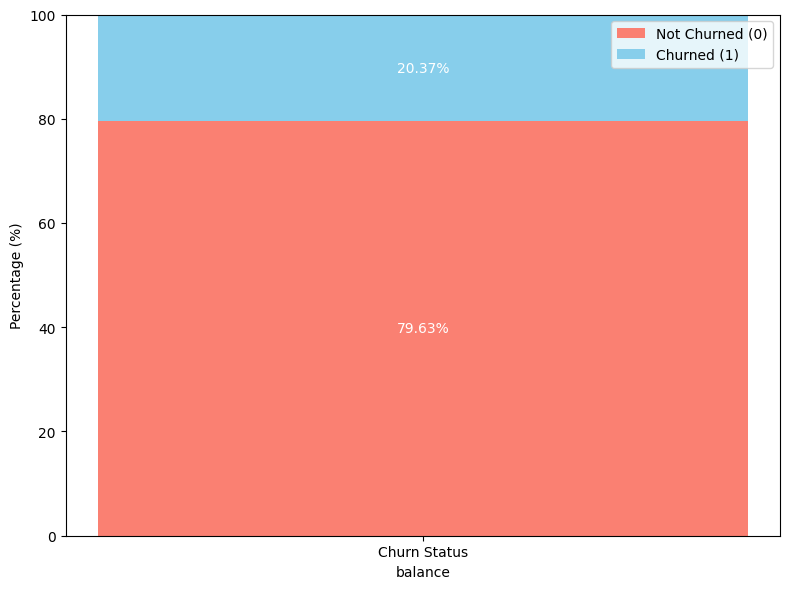

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 이탈 고객과 비이탈 고객의 총 계좌 잔액 개수
total_churned = len(df['balance'][df['churn'] == 1])
total_not_churned = len(df['balance'][df['churn'] == 0])

# 전체 계좌 잔액 개수
total_accounts = len(df)

# 각 그룹의 비율 계산
churned_percentage = (total_churned / total_accounts) * 100
not_churned_percentage = (total_not_churned / total_accounts) * 100

# 비율 데이터 생성
percentages = [churned_percentage, not_churned_percentage]

# 막대그래프로 비율 시각화 (스택드 형태)
plt.figure(figsize=(8, 6))

# Not Churned (0) 비율 (바닥에 위치)
plt.bar('Churn Status', not_churned_percentage, color='salmon', label='Not Churned (0)')
# Churned (1) 비율 (위에 쌓기)
plt.bar('Churn Status', churned_percentage, bottom=not_churned_percentage, color='skyblue', label='Churned (1)')

# 비율 값 표시 (순서 변경 및 중앙 위치 조정)
plt.text('Churn Status', not_churned_percentage / 2, f'{not_churned_percentage:.2f}%',
         ha='center', va='center', color='white')
plt.text('Churn Status', not_churned_percentage + churned_percentage / 2, f'{churned_percentage:.2f}%',
         ha='center', va='center', color='white')

plt.xlabel('balance')
plt.ylabel('Percentage (%)')
# plt.title('Stacked Bar Chart of Accounts by Churn Status')
plt.legend()
plt.ylim(0, 100)  # Y축 범위 설정

plt.tight_layout()
plt.show()


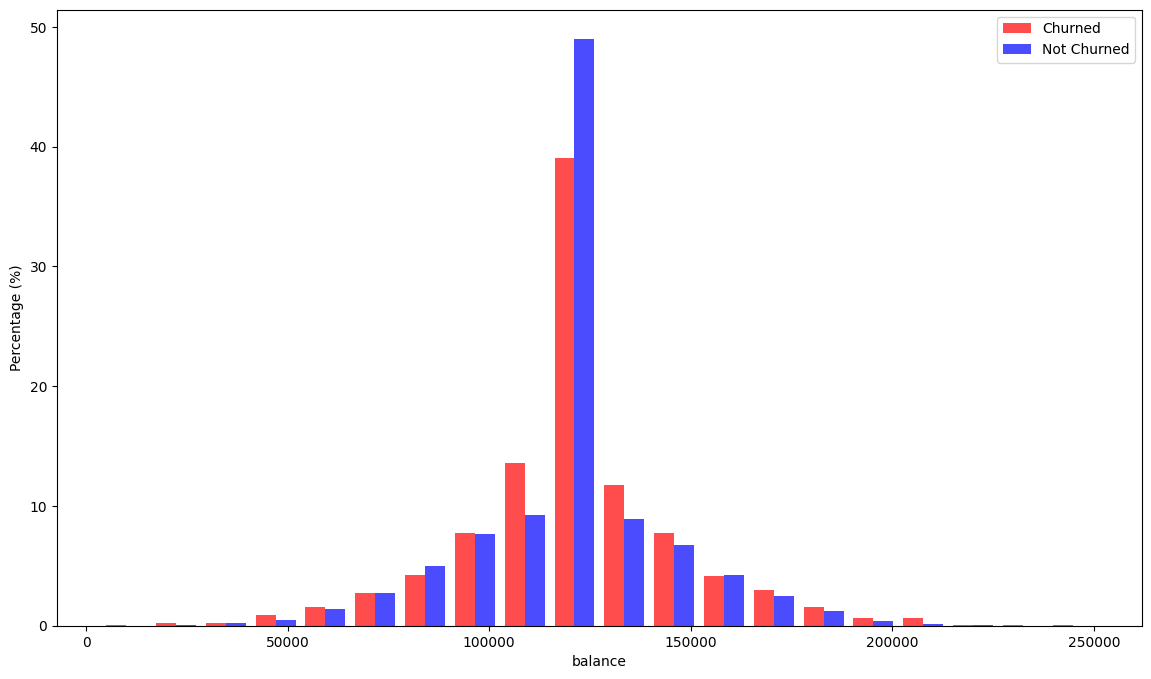

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 이탈 고객과 비이탈 고객의 계좌 잔액 비율 계산
churned_balances = df['balance'][df['churn'] == 1]
not_churned_balances = df['balance'][df['churn'] == 0]

# 계좌 잔액의 히스토그램 계산
bins = np.linspace(df['balance'].min(), df['balance'].max(), 21)  # 20개의 구간으로 나누기

churned_hist, _ = np.histogram(churned_balances, bins=bins)
not_churned_hist, _ = np.histogram(not_churned_balances, bins=bins)

# 비율 계산
churned_percentage = churned_hist / churned_hist.sum() * 100
not_churned_percentage = not_churned_hist / not_churned_hist.sum() * 100

# 히스토그램의 중간 값 계산 (bin 중심)
bin_centers = (bins[:-1] + bins[1:]) / 2

# 데이터프레임으로 변환
hist_df = pd.DataFrame({
    'Bin Center': bin_centers,
    'Churned (%)': churned_percentage,
    'Not Churned (%)': not_churned_percentage
})

# 막대그래프 시각화
plt.figure(figsize=(14, 8))
width = (bin_centers[1] - bin_centers[0]) * 0.4  # 막대폭 설정
plt.bar(bin_centers - width/2, hist_df['Churned (%)'], width=width, label='Churned', color='red', alpha=0.7)
plt.bar(bin_centers + width/2, hist_df['Not Churned (%)'], width=width, label='Not Churned', color='blue', alpha=0.7)
plt.xlabel('balance')
plt.ylabel('Percentage (%)')
# plt.title('Distribution of Account Balance by Customer Churn Status')
plt.legend()
plt.show()


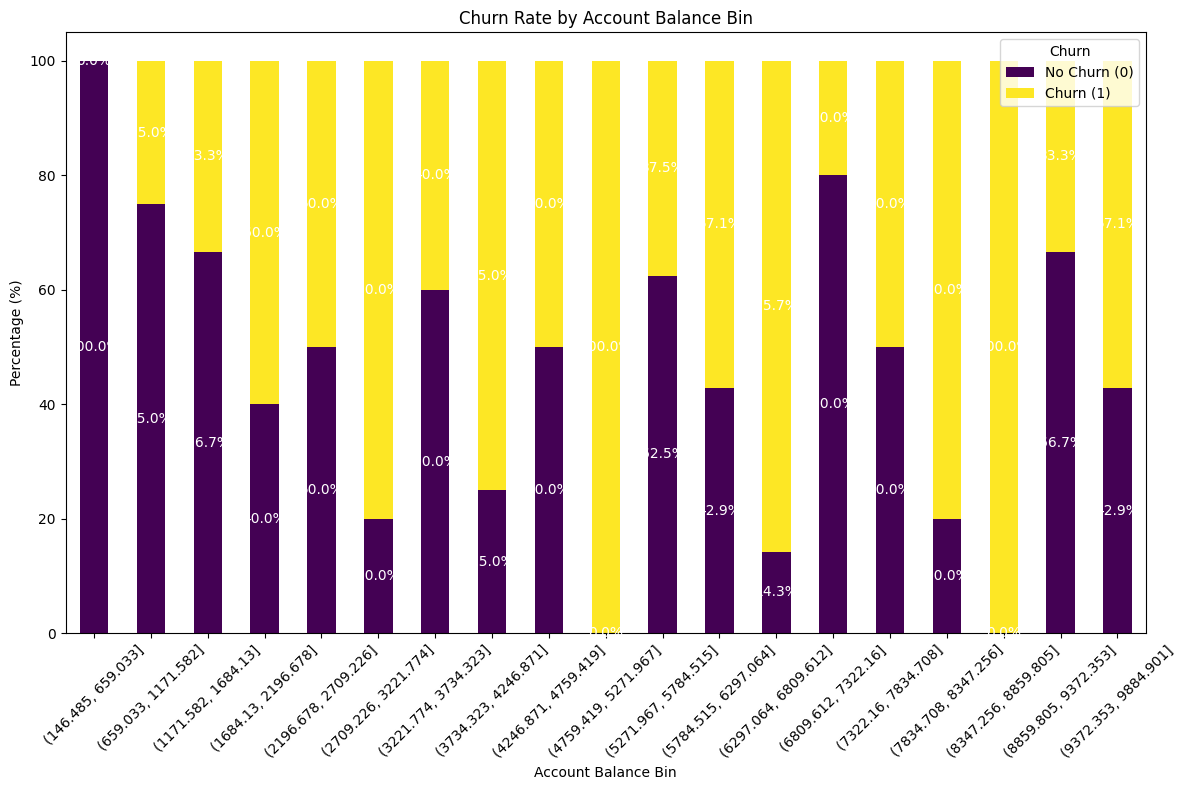

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 예시 데이터프레임 생성
np.random.seed(0)
data = {
    'balance': np.random.uniform(100, 10000, size=100),  # 계좌 잔액
    'churn': np.random.randint(0, 2, size=100)           # 고객 이탈 여부 (0 또는 1)
}
df = pd.DataFrame(data)

# 계좌 잔액을 일정 구간으로 나누기
bins = np.linspace(df['balance'].min(), df['balance'].max(), 20)  # 20개의 구간으로 나누기
df['balance_bin'] = pd.cut(df['balance'], bins=bins)

# 구간별 이탈 여부 비율 계산
grouped_counts = df.groupby(['balance_bin', 'churn']).size().unstack(fill_value=0)
grouped_percentage = grouped_counts.div(grouped_counts.sum(axis=1), axis=0) * 100

# 비율 플롯 생성
plt.figure(figsize=(12, 8))

# Bar plot으로 비율 시각화
grouped_percentage.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())

# 비율 표시
for i, (index, row) in enumerate(grouped_percentage.iterrows()):
    for j, value in enumerate(row):
        plt.text(i, row.cumsum().iloc[j] - value / 2, f'{value:.1f}%', ha='center', va='center', color='white')

plt.xlabel('Account Balance Bin')
plt.ylabel('Percentage (%)')
plt.title('Churn Rate by Account Balance Bin')
plt.legend(title='Churn', labels=['No Churn (0)', 'Churn (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
